## Парсинг – часть 1

Вам дан сайт http://books.toscrape.com/catalogue/page-1.html Выполните задания

**Задание 1. Напишите скрипт, который:**

1. Загружает HTML-страницу с сайта http://books.toscrape.com/catalogue/page-1.html

2. Проверяет, был ли запрос успешным

<details> <summary>Подсказка</summary> Используйте `requests.get()` и `BeautifulSoup`. </details>

3. Извлекает и печатает заголовок страницы (<title>)

In [96]:
import requests

url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
if(response.status_code) != 200:
    print('Не удалолсь прочитать страницу')
else:
    print('Удалось прочитать страницу')

Удалось прочитать страницу


In [2]:
from bs4 import BeautifulSoup

In [3]:
tree = BeautifulSoup(response.content, 'html.parser')

In [17]:
title = tree.find('title').text.strip()
print(title)

All products | Books to Scrape - Sandbox


**Задание 2. Извлечение информации о книгах
Скачайте данные со страницы 1 и получите:**

1. Название книги
2. Ссылку на книгу
3. Стоимость
4. Рейтинг (в текстовом виде: 'One', 'Two', ...)
5. Выведите информацию о первых 5 книгах в виде словаря.

In [74]:
info = tree.find_all('article', class_='product_pod')
books = dict()

for book in info[:5]:
    title = book.find('div', class_='image_container').find('img').get('alt')
    url = book.find('h3').find('a').get('href')
    price = book.find('p', class_='price_color').text
    rate = book.find('p', class_='star-rating').get('class')[1]
    books[title] = {'url': url, 'price': price, 'rate': rate}
    
for k, v in books.items():
    print(k, v, '\n')

A Light in the Attic {'url': 'a-light-in-the-attic_1000/index.html', 'price': '£51.77', 'rate': 'Three'} 

Tipping the Velvet {'url': 'tipping-the-velvet_999/index.html', 'price': '£53.74', 'rate': 'One'} 

Soumission {'url': 'soumission_998/index.html', 'price': '£50.10', 'rate': 'One'} 

Sharp Objects {'url': 'sharp-objects_997/index.html', 'price': '£47.82', 'rate': 'Four'} 

Sapiens: A Brief History of Humankind {'url': 'sapiens-a-brief-history-of-humankind_996/index.html', 'price': '£54.23', 'rate': 'Five'} 



**Задание 3. Сбор данных со всех страниц**

1. Напишите функцию get_page(p), которая возвращает информацию о книгах с p-й страницы.

2. Затем с помощью цикла и tqdm:

* Пройдитесь по всем 50 страницам

* Соберите данные о всех 1000 книгах

3. Сохраните результат в переменную infa (список словарей)

In [131]:
def get_page(p):
    url = f'http://books.toscrape.com/catalogue/page-{p}.html'
    response = requests.get(url)
    if response.status_code != 200:
        return -1
    
    tree = BeautifulSoup(response.content, 'html.parser')
    info = tree.find_all('article', class_='product_pod')
    
    data = []

    for book in info:
        books = dict()
        books['title'] = book.find('div', class_='image_container').find('img').get('alt')
        books['url'] = book.find('h3').find('a').get('href')
        books['price'] = book.find('p', class_='price_color').text
        books['rate'] = book.find('p', class_='star-rating').get('class')[1]
        data.append(books)
        
    return data

In [132]:
from tqdm import tqdm

In [135]:
all_books = []

for i in tqdm(range(1, 51)):
    data = get_page(i)
    all_books.extend(data)
    
print(all_books)

100%|██████████| 50/50 [00:28<00:00,  1.74it/s]

[{'title': 'A Light in the Attic', 'url': 'a-light-in-the-attic_1000/index.html', 'price': '£51.77', 'rate': 'Three'}, {'title': 'Tipping the Velvet', 'url': 'tipping-the-velvet_999/index.html', 'price': '£53.74', 'rate': 'One'}, {'title': 'Soumission', 'url': 'soumission_998/index.html', 'price': '£50.10', 'rate': 'One'}, {'title': 'Sharp Objects', 'url': 'sharp-objects_997/index.html', 'price': '£47.82', 'rate': 'Four'}, {'title': 'Sapiens: A Brief History of Humankind', 'url': 'sapiens-a-brief-history-of-humankind_996/index.html', 'price': '£54.23', 'rate': 'Five'}, {'title': 'The Requiem Red', 'url': 'the-requiem-red_995/index.html', 'price': '£22.65', 'rate': 'One'}, {'title': 'The Dirty Little Secrets of Getting Your Dream Job', 'url': 'the-dirty-little-secrets-of-getting-your-dream-job_994/index.html', 'price': '£33.34', 'rate': 'Four'}, {'title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'url': 'the-coming-woman-a-novel-based-on-

**Задание 4. Преобразование в таблицу и сохранение**

1. Создайте DataFrame из собранных данных:

*Преобразуйте цену из строки £51.77 в число 51.77 в отдельном столбце new_price*

2. Сохраните таблицу в CSV и Excel



In [136]:
import pandas as pd

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [138]:
df = pd.DataFrame(all_books)
df.head()

,title,url,price,rate
0,A Light in the Attic,a-light-in-the-attic_1000/index.html,£51.77,Three
1,Tipping the Velvet,tipping-the-velvet_999/index.html,£53.74,One
2,Soumission,soumission_998/index.html,£50.10,One
3,Sharp Objects,sharp-objects_997/index.html,£47.82,Four
4,Sapiens: A Brief History of Humankind,sapiens-a-brief-history-of-humankind_996/index...,£54.23,Five


In [140]:
df['new_price'] = df['price'].apply(lambda x: float(x.strip('£')))
df.head()

,title,url,price,rate,new_price
0,A Light in the Attic,a-light-in-the-attic_1000/index.html,£51.77,Three,51.77
1,Tipping the Velvet,tipping-the-velvet_999/index.html,£53.74,One,53.74
2,Soumission,soumission_998/index.html,£50.10,One,50.10
3,Sharp Objects,sharp-objects_997/index.html,£47.82,Four,47.82
4,Sapiens: A Brief History of Humankind,sapiens-a-brief-history-of-humankind_996/index...,£54.23,Five,54.23


In [142]:
df.to_csv('books.csv')

In [146]:
df.to_excel('books.xlsx')

**Задание 5. Анализ распределения рейтингов**

1. Посчитайте, сколько книг имеет каждый рейтинг от One до Five

2. Постройте гистограмму рейтингов

3. Найдите книги с рейтингом "Five" и выведите их количество

In [147]:
df['rate'].value_counts()

rate
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64

In [148]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rate', ylabel='Count'>

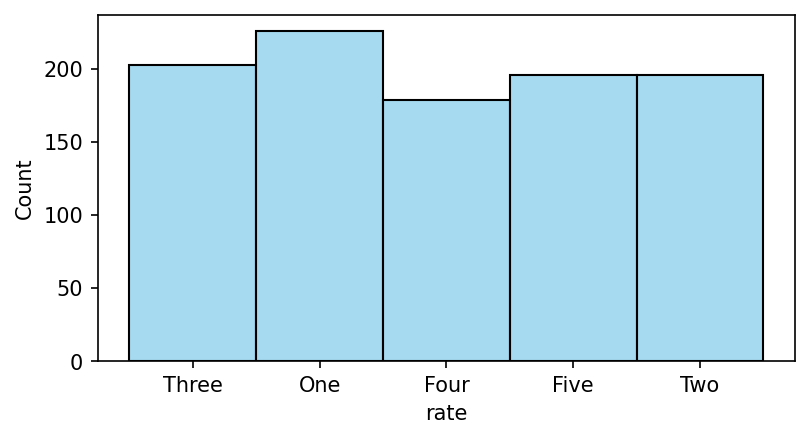

In [160]:
plt.figure(figsize=(6,3), dpi=150)
sns.histplot(data=df, x='rate', color='skyblue')

In [155]:
five_star = df[df['rate'] == 'Five']
five_star.head()

,title,url,price,rate,new_price
4,Sapiens: A Brief History of Humankind,sapiens-a-brief-history-of-humankind_996/index...,£54.23,Five,54.23
12,Set Me Free,set-me-free_988/index.html,£17.46,Five,17.46
13,Scott Pilgrim's Precious Little Life (Scott Pi...,scott-pilgrims-precious-little-life-scott-pilg...,£52.29,Five,52.29
14,Rip it Up and Start Again,rip-it-up-and-start-again_986/index.html,£35.02,Five,35.02
23,Chase Me (Paris Nights #2),chase-me-paris-nights-2_977/index.html,£25.27,Five,25.27


In [159]:
five_star.shape[0]

196

## Парсинг – часть 2

По аналогии вам предстоит собрать данные с сайта https://quotes.toscrape.com/.

Нужно получить цитату, автора и теги, связанные с этой цитатой.

Напишите программу, где пользователь вводит тег, а ему выводятся все цитаты, у которых есть такой тег (например, 'truth').

**Задание 6.** Спарсите сайт https://quotes.toscrape.com и для каждой цитаты получите:

* Текст цитаты

* Имя автора

* Список тегов

In [161]:
import requests

url = 'https://quotes.toscrape.com/page/1/'
response = requests.get(url)

if(response.status_code) != 200:
    print('Не удалолсь прочитать страницу')
else:
    print('Удалось прочитать страницу')

Удалось прочитать страницу


In [164]:
soup = BeautifulSoup(response.content, 'html.parser')
quotes = soup.find_all('div', class_ = 'quote')

In [186]:
info = []

for q in quotes:
    d = dict()
    d['text'] = q.find('span', class_='text').text.strip('“”')
    d['author'] = q.find('small', class_='author').text
    d['tags'] = q.find('div', class_='tags').find('meta', class_='keywords').get('content').split(',')
    info.append(d)

In [193]:
tag = input()
flag = False

for item in info:
    if tag in item['tags']:
        print(item['text'])
        flag = True
        
if not flag:
    print('Цитаты с таким тегом не найдены')

love
It is better to be hated for what you are than to be loved for what you are not.


**Задание 7. Сбор данных с нескольких страниц**
Напишите функцию get_quotes_on_page(p), которая возвращает список словарей с цитатами на p-й странице. Затем:

* Пройдитесь по 9 страницам

* Соберите все цитаты

* Сохраните в переменной infa



In [197]:
def get_quotes_on_page(p):
    url = f'https://quotes.toscrape.com/page/{p}/'
    response = requests.get(url)

    if(response.status_code) != 200:
        return -1
    
    soup = BeautifulSoup(response.content, 'html.parser')
    quotes = soup.find_all('div', class_ = 'quote')
    page = []

    for q in quotes:
        d = dict()
        d['text'] = q.find('span', class_='text').text.strip('“”')
        d['author'] = q.find('small', class_='author').text
        d['tags'] = q.find('div', class_='tags').find('meta', class_='keywords').get('content').split(',')
        page.append(d)
        
    return page

In [199]:
all_quotes = []

for i in tqdm(range(1, 10)):
    data = get_quotes_on_page(i)
    all_quotes.extend(data)
    
print(all_quotes)

100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

[{'text': 'The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.', 'author': 'Albert Einstein', 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}, {'text': 'It is our choices, Harry, that show what we truly are, far more than our abilities.', 'author': 'J.K. Rowling', 'tags': ['abilities', 'choices']}, {'text': 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.', 'author': 'Albert Einstein', 'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']}, {'text': 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.', 'author': 'Jane Austen', 'tags': ['aliteracy', 'books', 'classic', 'humor']}, {'text': "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.", 'author': 'Marilyn Monroe', 'tags': ['be-yourself', 'inspirational']}, {'te

**Задание 8.** Создайте таблицу с колонками:

* quote_text

* author

* tags

Сохраните результат в Excel-файл quotes.xlsx.

In [203]:
qu = pd.DataFrame(all_quotes)
qu = qu.rename(columns={'text': 'quote_text'})
qu.head()

,quote_text,author,tags
0,The world as we have created it is a process o...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,"[abilities, choices]"
2,There are only two ways to live your life. One...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"The person, be it gentleman or lady, who has n...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,"[be-yourself, inspirational]"


In [204]:
qu.to_csv('quotes.csv')

In [205]:
qu.to_excel('quotes.xlsx')

**Задание 9. Анализ по авторам**
Найдите, какой автор встречается чаще других

* Сколько цитат у Альберта Эйнштейна?

* Сколько уникальных авторов?

In [209]:
qu['author'].value_counts().idxmax()

'Albert Einstein'

In [210]:
qu['author'].value_counts()['Albert Einstein']

10

In [212]:
qu['author'].nunique()

44

**Задание 10. Поиск по тегу**
Пользователь вводит тег (например, humor), а программа:

* Ищет все цитаты с этим тегом

* Выводит текст и автора

In [213]:
qu.head(1)

,quote_text,author,tags
0,The world as we have created it is a process o...,Albert Einstein,"[change, deep-thoughts, thinking, world]"


In [229]:
tag = input()

humor


In [230]:
for row in qu.iterrows():
    tags = row[1].tags
    if tag in tags:
        author = row[1].author
        text = row[1].quote_text
        print(f"author: {author}\ntext: {text}\n\n")

author: Jane Austen
text: The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.


author: Steve Martin
text: A day without sunshine is like, you know, night.


author: Garrison Keillor
text: Anyone who thinks sitting in church can make you a Christian must also think that sitting in a garage can make you a car.


author: Jim Henson
text: Beauty is in the eye of the beholder and it may be necessary from time to time to give a stupid or misinformed beholder a black eye.


author: Charles M. Schulz
text: All you need is love. But a little chocolate now and then doesn't hurt.


author: Suzanne Collins
text: Remember, we're madly in love, so it's all right to kiss me anytime you feel like it.


author: Charles Bukowski
text: Some people never go crazy. What truly horrible lives they must lead.


author: Terry Pratchett
text: The trouble with having an open mind, of course, is that people will insist on coming along and trying to put things in

**Задание 11.**
Постройте столбчатую диаграмму по количеству цитат у 10 самых популярных авторов.

In [243]:
top = qu['author'].value_counts()[:10]
top

author
Albert Einstein      10
J.K. Rowling          8
Marilyn Monroe        7
Dr. Seuss             5
C.S. Lewis            5
Mark Twain            5
Jane Austen           5
Bob Marley            3
Eleanor Roosevelt     2
Suzanne Collins       2
Name: count, dtype: int64

<Axes: ylabel='author'>

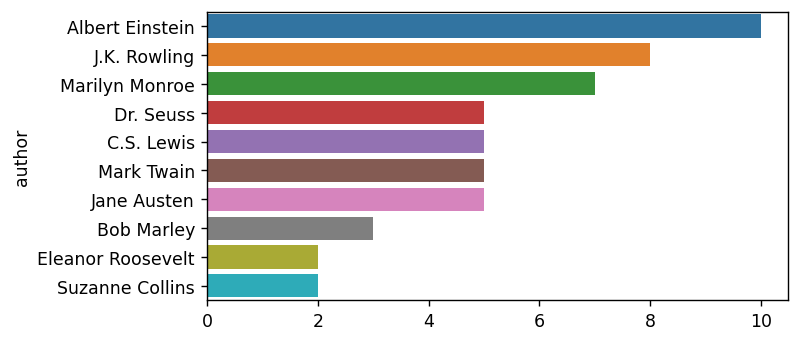

In [244]:
plt.figure(figsize=(6, 3), dpi=125)

sns.barplot(x=top.values, y=top.index)